# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('House_Rent_Dataset.csv', sep=None, engine='python')

Saving House_Rent_Dataset.csv to House_Rent_Dataset.csv


In [3]:
df.shape

(4746, 12)

In [4]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (5 балів)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [6]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_percent

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


In [7]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


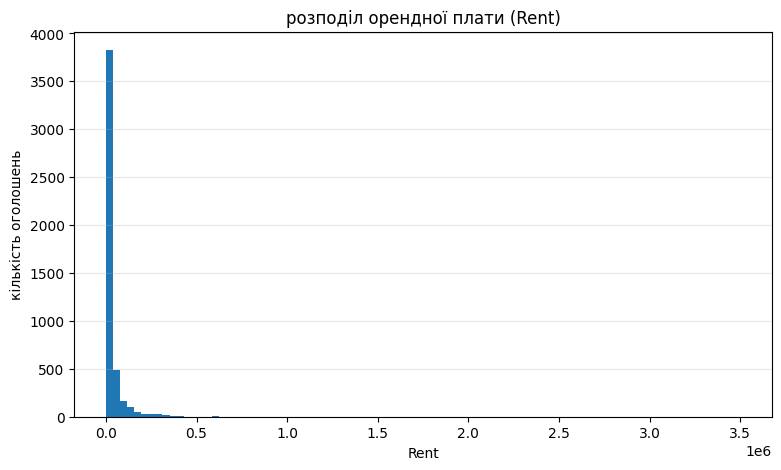

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.hist(df['Rent'], bins=90)
plt.xlabel('Rent')
plt.ylabel('кількість оголошень')
plt.title('розподіл орендної плати (Rent)')
plt.grid(axis='y', alpha=0.3)

plt.show()

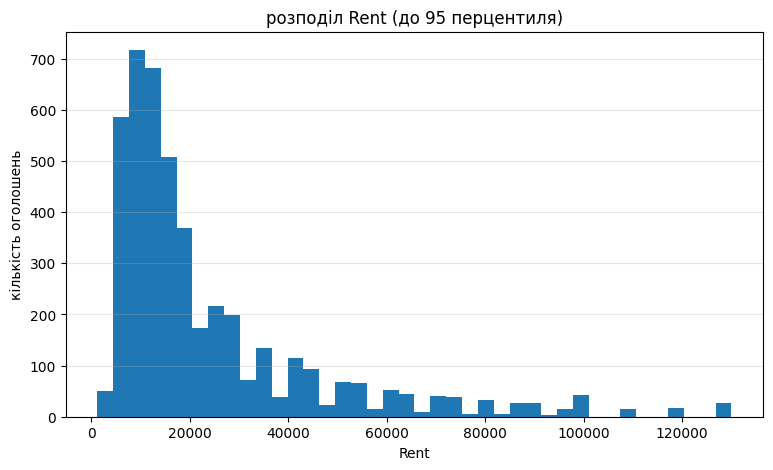

In [9]:
upper = df['Rent'].quantile(0.95)

plt.figure(figsize=(9, 5))
plt.hist(df[df['Rent'] <= upper]['Rent'], bins=40)
plt.xlabel('Rent')
plt.ylabel('кількість оголошень')
plt.title('розподіл Rent (до 95 перцентиля)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [10]:
Q1 = df['Rent'].quantile(0.25)
Q3 = df['Rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(np.float64(-24500.0), np.float64(67500.0))

In [11]:
outliers = df[(df['Rent'] < lower_bound) | (df['Rent'] > upper_bound)]
outliers.shape[0]

520

In [12]:
df_clean = df[(df['Rent'] >= lower_bound) & (df['Rent'] <= upper_bound)]

In [13]:
df['Rent'].describe()

,Rent
count,4.746000e+03
mean,3.499345e+04
std,7.810641e+04
min,1.200000e+03
25%,1.000000e+04
50%,1.600000e+04
75%,3.300000e+04
max,3.500000e+06


In [14]:
df_clean['Rent'].describe()

,Rent
count,4226.000000
mean,19286.162565
std,13825.395996
min,1200.000000
25%,9500.000000
50%,15000.000000
75%,25000.000000
max,67000.000000


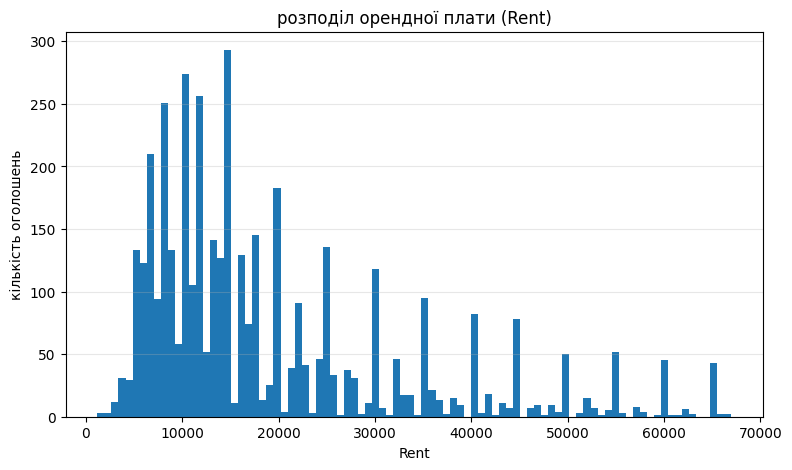

In [15]:
plt.figure(figsize=(9, 5))
plt.hist(df_clean['Rent'], bins=90)
plt.xlabel('Rent')
plt.ylabel('кількість оголошень')
plt.title('розподіл орендної плати (Rent)')
plt.grid(axis='y', alpha=0.3)

plt.show()

In [16]:
categorical_cols = df_clean.select_dtypes(include='object').columns
categorical_cols

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [17]:
df_clean[categorical_cols].nunique()

,0
Posted On,80
Floor,340
Area Type,3
Area Locality,1997
City,6
Furnishing Status,3
Tenant Preferred,3
Point of Contact,3



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [18]:
metrics_df = df_clean[['Rent', 'BHK', 'Size', 'Bathroom']].dropna()


correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='кореляція між метриками взаємодії',
    labels=dict(color="кореляція")
)
fig.update_layout(height=500, width=500)
fig.show()

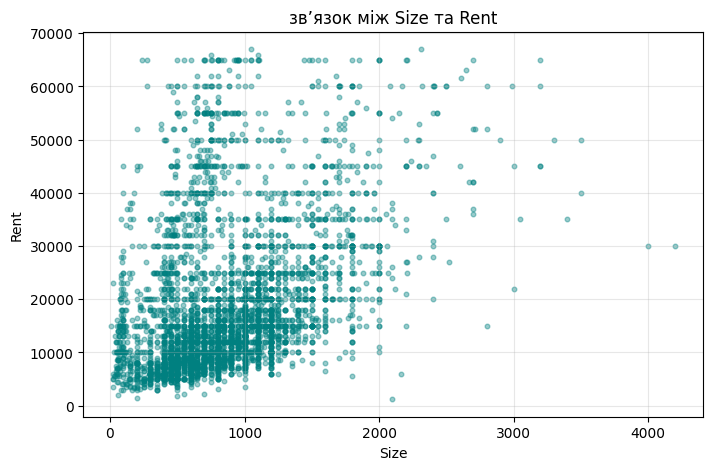

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(df_clean['Size'], df_clean['Rent'], s=11, alpha=0.4, color='teal')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('звʼязок між Size та Rent')
plt.grid(alpha=0.3)
plt.show()

<Figure size 900x500 with 0 Axes>

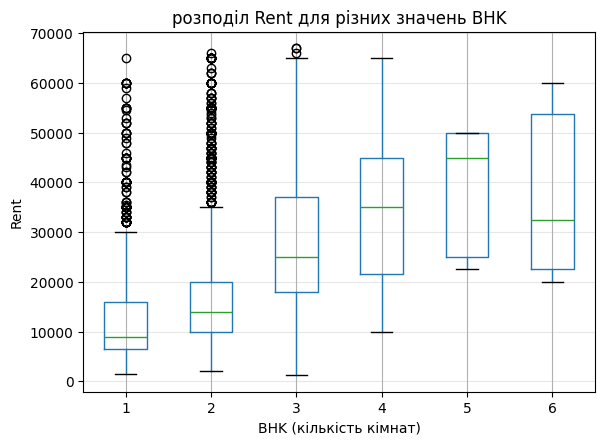

In [20]:
plt.figure(figsize=(9, 5))
df_clean.boxplot(column='Rent', by='BHK')
plt.xlabel('BHK (кількість кімнат)')
plt.ylabel('Rent')
plt.title('розподіл Rent для різних значень BHK')
plt.suptitle('')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [21]:
# boxplot аналіз показує чіткий позитивний зв'язок між кількістю кімнат (BHK) та
# орендною платою (Rent): зі зростанням BHK зростає медіанна вартість оренди.
# водночас зі збільшенням кількості кімнат зростає і розкид цін, що свідчить про
# більшу гетерогенність пропозицій у сегменті багатокімнатного житла.
# перекриття розподілів між сусідніми категоріями BHK вказує на значний вплив
# додаткових факторів (зокрема локації та інших характеристик житла)

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [22]:
categorical_cols = [
    'Area Type',
    'City',
    'Furnishing Status',
    'Tenant Preferred',
    'Point of Contact']

cols_to_drop = ['Area Locality']

In [23]:
df_fe = df_clean.copy()

df_fe['Rent_per_sqft'] = df_fe['Rent'] / df_fe['Size']

df_fe['Floor_num'] = df_fe['Floor'].str.extract(r'(\d+)').astype(float)
df_fe['Total_floors'] = df_fe['Floor'].str.extract(r'out of (\d+)').astype(float)

In [24]:
df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

In [25]:
df_fe = df_fe.drop(columns=cols_to_drop + ['Posted On', 'Floor'])

In [26]:
X = df_fe.drop(columns=['Rent'])
y = df_fe['Rent']

In [27]:
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [28]:
X.head()
X.shape, y.shape

((4226, 19), (4226,))

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [29]:
X.isna().sum().sort_values(ascending=False).head(10)

,0
Total_floors,4
Floor_num,1
BHK,0
Bathroom,0
Size,0
Rent_per_sqft,0
Area Type_Carpet Area,0
Area Type_Super Area,0
City_Chennai,0
City_Delhi,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train[numeric_cols] = imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = imputer.transform(X_test[numeric_cols])

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [32]:
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nзміщення (intercept): {model.intercept_:.2f}")

BHK: 1532.40
Size: 6299.32
Bathroom: 849.81
Rent_per_sqft: 3895.15
Floor_num: -384.01
Total_floors: 1893.39
Area Type_Carpet Area: -2747.46
Area Type_Super Area: -3226.52
City_Chennai: -823.81
City_Delhi: -477.97
City_Hyderabad: -3011.98
City_Kolkata: -2268.25
City_Mumbai: 14073.69
Furnishing Status_Semi-Furnished: -3057.11
Furnishing Status_Unfurnished: -3705.30
Tenant Preferred_Bachelors/Family: -498.51
Tenant Preferred_Family: -1960.52
Point of Contact_Contact Builder: -2742.16
Point of Contact_Contact Owner: -7083.14

зміщення (intercept): 30232.08


In [33]:
# За абсолютним значенням коефіцієнтів найбільший вплив на прогноз мають
# ознаки City_Mumbai та Point of Contact_Contact Owner,
# але серед числових характеристик житла найбільш значущою ознакою є Size,
# що відповідає економічній інтуїції про залежність орендної плати від площі житла.

In [34]:
y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'Реальна оренда': y_test.values[:10],
    'Прогнозована оренда': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальна оренда  Прогнозована оренда  Помилка
0           22000              28661.0  -6661.0
1            5000               2440.0   2560.0
2           37000              38017.0  -1017.0
3            8000               2285.0   5715.0
4           15000              14721.0    279.0
5           20000              20611.0   -611.0
6            8500              14075.0  -5575.0
7            7000               4305.0   2695.0
8            3000               -399.0   3399.0
9            8000               5175.0   2825.0


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тестовій вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

# Порівняння з навчальною вибіркою
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("="*50)
print("МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print("="*50)
print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ на тестовій вибірці:

MAE: 4991.66
RMSE: 8278.95
R²: 0.643
МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:

MAE: 4963.31
RMSE: 6937.37
R²: 0.748


In [36]:
np.mean(y_train)

np.float64(19349.54852071006)

In [ ]:
# середня абсолютна помилка становить 25–26% від середньої ціни оренди
# це прийнятний результат, але далеко не ідеальний

# сильного перенавчання немає, тому що
# метрики на train і test досить близькі

# недонавчання теж немає, бо на train модель
# працює досить добре ( модель пояснює 75% варіації в даних)

In [37]:
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальні vs Прогнозовані (тестова вибірка)',
    labels={'x': 'Реальні', 'y': 'Прогнозовані'},
    opacity=0.6
)

# Додаємо ідеальну лінію (де прогноз = реальність)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=500)
fig.show()

In [38]:
# з графіка бачимо, що точки загалом лежать уздовж червоної діагоналі (тобто модель ловить тренд)

# для великих значень Rent є систематичне недооцінювання
# (реальні значення високі, а прогнози нижчі)

# можливо, модель стягує екстремальні значення до середніх

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [45]:
residuals = y_test - y_test_pred

fig = px.histogram(
    x=residuals,
    nbins=50,
    title='розподіл помилок прогнозування',
    labels={'x': 'помилка (реальні - прогнозовані)', 'y': 'кількість'},
    color_discrete_sequence=['#e74c3c']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="ідеальний прогноз")
fig.update_layout(height=400, width=800)
fig.show()

In [62]:
# бачимо нормальний розподіл помилок (симетричний навколо нуля) -
# значить, модель однаково часто завищує і занижує значення
# але також бачимо декілька викидів з аномальними значеннями, до яких модель
# є чутливою.

In [50]:
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='залежність помилок від прогнозованих значень',
    labels={'x': 'прогнозовані ціни', 'y': 'помилка'},
    opacity=0.5
)

fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="без помилки")

fig.update_layout(height=400, width=1200)
fig.show()

In [61]:
# бачимо, що з ростом прогнозованого значення росте і помилка

In [52]:
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred,
    'error': np.abs(residuals)
})

top_errors = errors_df.nlargest(5, 'error')
print("варіанти з найбільшими помилками прогнозування:")
print(top_errors)

варіанти з найбільшими помилками прогнозування:
       real      predicted          error
4653  15000  149341.740673  134341.740673
275   30000   67865.441288   37865.441288
3962  65000   33876.322175   31123.677825
2512  52000   24075.574848   27924.425152
3520  65000   37332.070437   27667.929563


In [57]:
rows_to_keep = [4653, 275, 3962, 2512, 3520]
subset = df.iloc[rows_to_keep]

In [58]:
print(subset)

       Posted On  BHK   Rent  Size            Floor    Area Type  \
4653  2022-06-29    3  15000    10       1 out of 1  Carpet Area   
275   2022-07-04    4  30000  4000  Ground out of 3   Super Area   
3962  2022-07-08    3  65000  1850       5 out of 5  Carpet Area   
2512  2022-05-10    2  52000  1125       2 out of 5   Super Area   
3520  2022-07-10    3  65000  1444     11 out of 14   Super Area   

                    Area Locality       City Furnishing Status  \
4653            Ghatkesar, NH 2 2  Hyderabad         Furnished   
275   Sakher Bazar, Purba Barisha    Kolkata         Furnished   
3962   Patrika Nagar, Hitech City  Hyderabad         Furnished   
2512                        Saket      Delhi         Furnished   
3520                 Nungambakkam    Chennai    Semi-Furnished   

      Tenant Preferred  Bathroom Point of Contact  
4653  Bachelors/Family         3    Contact Owner  
275   Bachelors/Family         3    Contact Agent  
3962         Bachelors         3    Co

In [60]:
# модель найбільше помиляється на екстремальних значеннях площі:
# там де вона або дуже маленька (10), або дуже велика (4000).
# також ціна залежить від району, стану, поверху, типу будинку тощо, але в даних варіантах можуть
# бути вказані нетипові ціни для подібних параметрів житла, або це помилки в даних

# тобто бачимо що лінійна регресія чутлива до викидів та є необхідність додаткової обробки даних.
# наприклад, можемо видалити аномалії/обмежити верхній перцентиль, створити різні
# моделі для різних міст (оскільки принципи ціноутворення може значно відрізнятися
# залежно від міста)
# або взагалі використати інший тип моделі, нелінійний.